# pBAD induction control

Expressing free Halo tag from a pBAD plasmid, in the same conditions as the Gam experiments.

This is a control to check that at the arabinose concentration used (1%), Gam should be over-expressed.

In [3]:
from pyberries.data import DatasetPool

data = DatasetPool(path='./../../BACMMAN_datasets/',
                   dsList=['240312_1', '240312_2', '240312_3', '240312_4', '240312_5', '240312_6'],
                   groups=['1%', '1%', '1%', '0', '0', '0']
                   )

Dataset 240312_1 (group 1%): loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_2 (group 1%): loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_3 (group 1%): loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_4 (group 0): loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_5 (group 0): loaded objects ['Bacteria_large', 'Halo']
Dataset 240312_6 (group 0): loaded objects ['Bacteria_large', 'Halo']


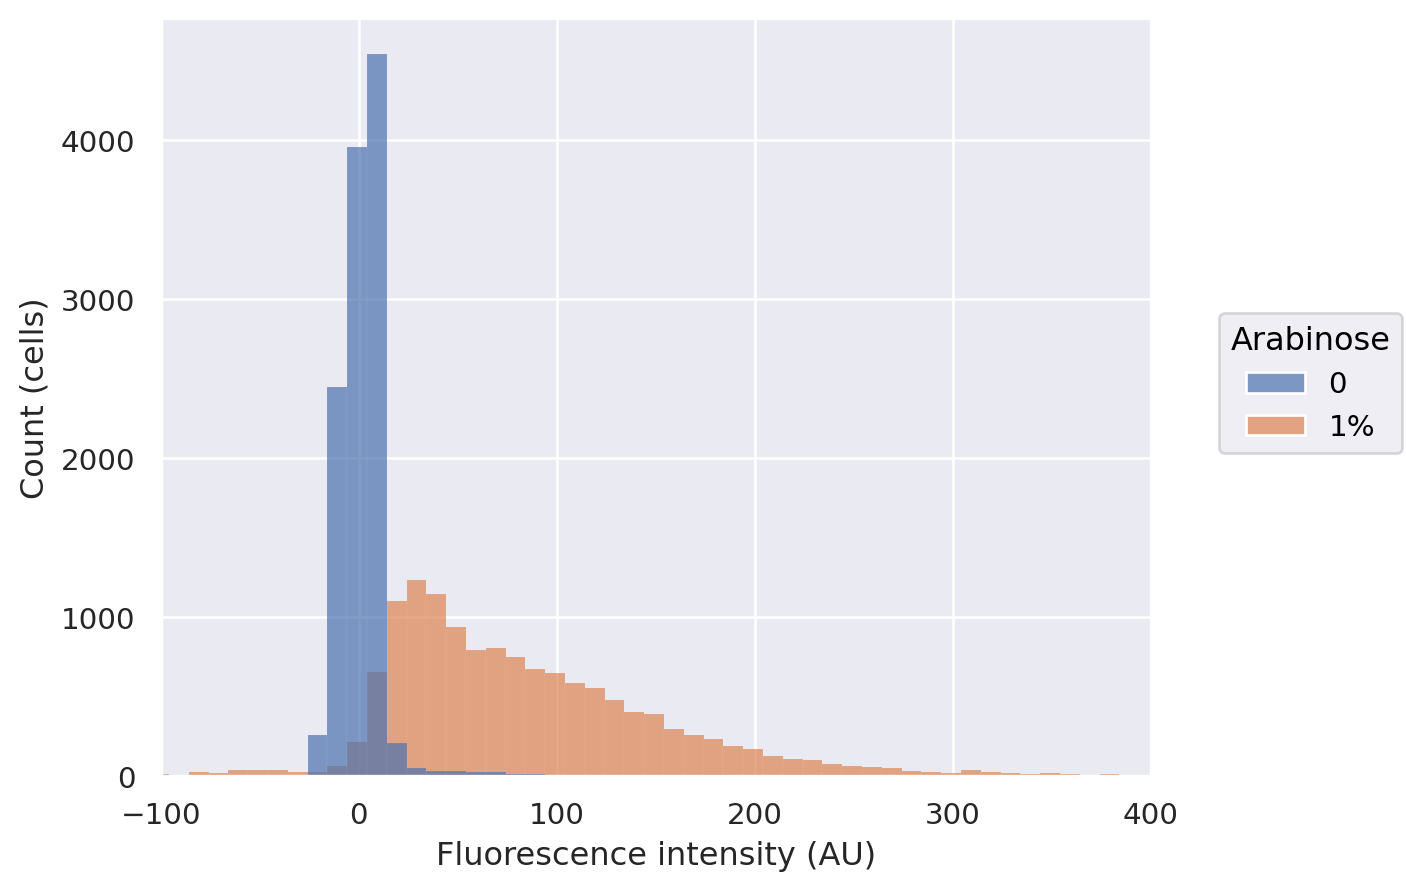

In [10]:
import seaborn.objects as so

(
    so.Plot(data.Bacteria_large, x='SNR', color='Group')
    .add(so.Bars(), so.Hist(binwidth=10, common_norm=False))
    .limit(x=(-100, 400))
    .label(x='Fluorescence intensity (AU)', y='Count (cells)', color='Arabinose')
    .scale(color=so.Nominal(order=['0', '1%']))
)

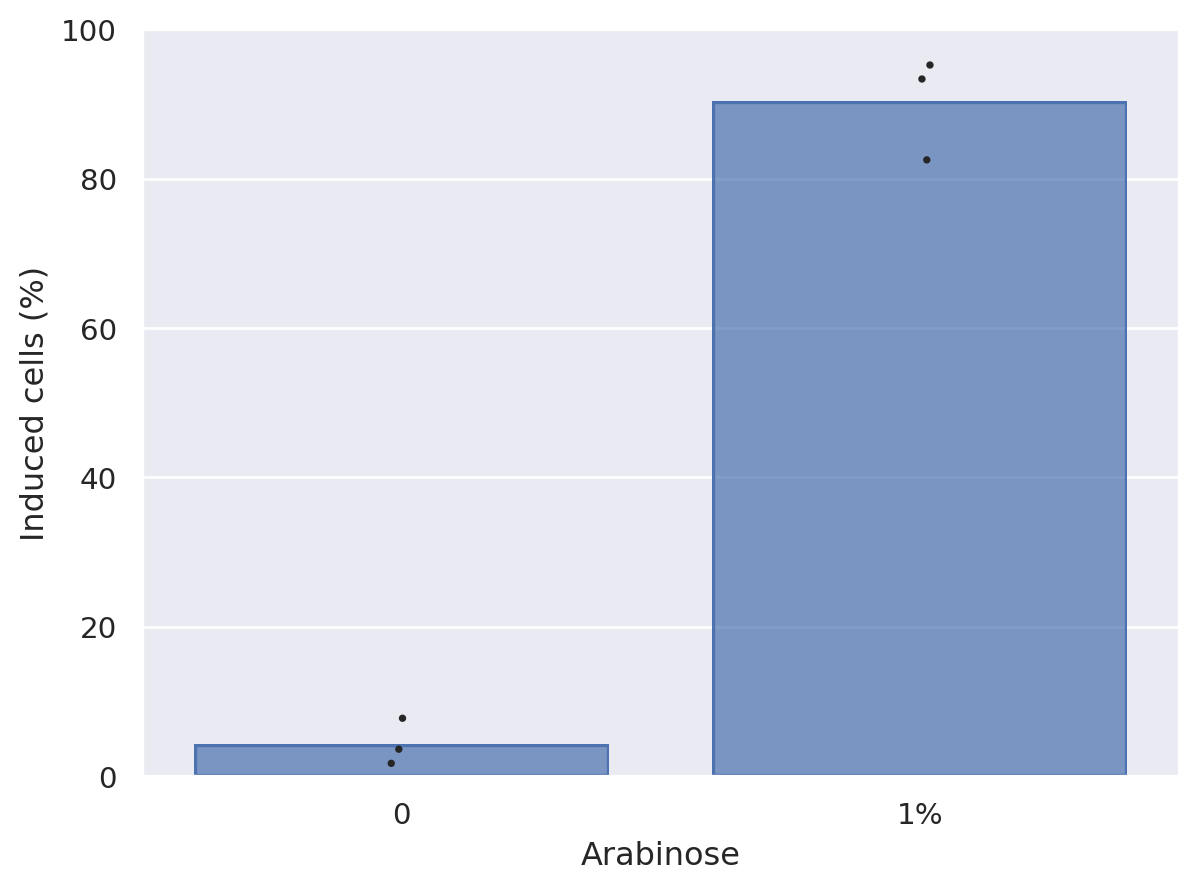

In [9]:
import seaborn.objects as so

df = (data
      .Bacteria_large
      .assign(induced=lambda df: df.SNR
                                   .gt(df
                                       .query('Group == "0"')
                                       .SNR
                                       .quantile(.95)
                                       )
                                   .mul(100)
              )
      .groupby(['Group', 'Dataset'])
      .agg({'induced':'mean'})
      )

(
    so.Plot(df, x='Group', y='induced')
    .add(so.Bar(), so.Agg())
    .add(so.Dots(color='k', marker='.', fillalpha=1), so.Jitter(.1))
    .scale(x=so.Nominal(order=['0', '1%']))
    .limit(y=(0, 100))
    .label(x='Arabinose', y='Induced cells (%)')
)